In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv("hamspam.csv", index_col='Unnamed: 0')

data.columns = ["Label", "News"]
data

,Label,News
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...
...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...
5563,ham,Will ü b going to esplanade fr home?
5564,ham,"Pity, * was in mood for that. So...any other s..."
5565,ham,The guy did some bitching but I acted like i'd...


In [72]:
data.head()

,Label,News
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [73]:
data[data["Label"] == "ham"].shape

(4821, 2)

In [74]:
data[data["Label"] == "spam"].shape

(746, 2)

In [75]:
y = data["Label"]
y.shape

(5567,)

In [76]:
x = data.drop(["Label"], axis=1)

In [77]:
x.shape

(5567, 1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x["News"],y,test_size=0.2, random_state=53)

In [79]:
x_train.shape

(4453,)

In [80]:
y_train.shape

(4453,)

In [81]:
count_vectorizer = CountVectorizer(stop_words ="english")
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

count_train.toarray().shape

(4453, 7540)

In [82]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 

In [84]:
count_vectorizer = CountVectorizer(stop_words ="english")
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

count_train.toarray().shape

count_vectorizer.get_feature_names()

In [85]:
# Imported as sir's code from ProtectedText

#function Copied from Scikit Learn Confusion matrix Web Link
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

clf = MultinomialNB(alpha=0.5)

clf.fit(count_train, y_train)

pred = clf.predict(count_test)

pred.shape

metrics.accuracy_score(y_test, pred)

cm = metrics.confusion_matrix(y_test, pred, labels=['spam', 'ham'])

import itertools
plot_confusion_matrix(cm,classes=['spam','ham'])

Confusion matrix, without normalization


Confusion matrix, without normalization


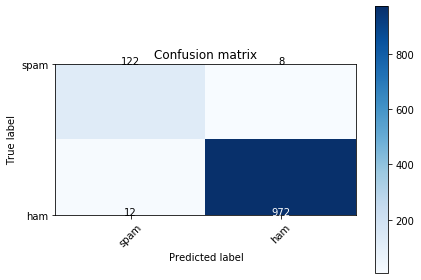

In [87]:
import itertools
plot_confusion_matrix(cm,classes=['spam','ham'])

In [88]:
#Logistic regression

In [ ]:
#Random forest